## Investigating ARM Radars


## Overview
   
Within this notebook, we will cover:

1. General structure of radar data
1. Radar Scanning
1. Look at various ARM radars
1. Do a simple analysis 

## Prerequisites
| Concepts | Importance | Notes |
| --- | --- | --- |
| [Intro to Cartopy](https://foundations.projectpythia.org/core/cartopy/cartopy.html) | Helpful | Basic features |
| [Matplotlib Basics](https://foundations.projectpythia.org/core/matplotlib/matplotlib-basics.html) | Helpful | Basic plotting |
| [NumPy Basics](https://foundations.projectpythia.org/core/numpy/numpy-basics.html) | Helpful | Basic arrays |

- **Time to learn**: 45 minutes
---

In [159]:
import os
import warnings

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

import pyart
from pyart.testing import get_test_data
import xradar as xd
import numpy as np

warnings.filterwarnings("ignore")

We will use Py-ART to investigate data. This is not a Py-ART tutorial. Also this notebook is limited to moment data and will not cover lower level data such as doppler spectra. 

## ARM Radars

ARM's main radars can be broken down into two categories: Scanning and zenith pointing. ARM operates radars at four requency bands: W, Ka, X and C band. ARM denotes radars as either cloud or precipitation sensing. W and Ka are only denoted as cloud sensing, X is both and C is only precipitation sensing. The radars are the Marine W-Band ARM Cloud Radar (M-WACR), Ka band Zenith Radar (Ka-ZR), Ka band ARM Scanning Cloud Radar (Ka-SACR), X band Scanning ARM Radar (X-SACR), X band Scanning ARM Precipition Radar (X-SAPR) and C band Scanning ARM Precipitation Radar (C-SAPR). The notation pertain more to the operation and suitability of the radar (eg there is nothing stopping a user using KAZR to study Precipitation). 


![alt text](radars.jpg "Title")



BNF has a C-SAPR, X-SACR, Ka-SACR and a KaZR. Why the different wavelengths? it all comes down to sensitivity, backscatter cross section and if the scattering is in the Reighley regieme where the size of the drops are much smaller than the wavelenth. 

![alt text](rcs.jpg "Title")



The sensitivity gains come from the beam with can be approximated as $\theta\approx 1.22 \frac{\lambda}{D}\quad(\text{considering that}\,\sin\theta\approx\theta)$. Bigger antenna smaller angle. Shorter wavelength smaller angle. And a smaller angle means you can squeeze more power into a volume.

The power recieved by a radar can be written as: 

$P_r = \frac{\pi^3 c}{1024 \ln(2)} \cdot \frac{P_t G^2 \theta^2 h |\kappa|^2 Z}{\lambda^2 r^2}$

This can be broken down to components intrinsic to the radar and the medium:

$P_r = \underbrace{\frac{P_t G^2 \lambda^2 c \tau}{(4\pi)^3}}_{\text{Radar}} \underbrace{\frac{\pi^5 |K|^2}{\lambda^4} \frac{1}{R^2} \sum D_i^6}_{\text{Hydrometeors}}$

The last component, the sum over all distribited scatters is, as described in the previous talk one of the basic measures from a radar is reflectivity factor:

$Z = \int_{0}^{Dmax} N D^6\mathrm{d}D $

As long as $D < \lambda$ reflectivity factor is wavelength invariant.  


## Lets dig into some data to give some examples:

In [160]:
kazr = pyart.io.read('bnfkazr2cfrgeM1.a1.20250422.040000.nc')

In [181]:
kazr.info()

altitude:
	data: <ndarray of type: float32 and shape: (1,)>
	long_name: Altitude
	units: m
	standard_name: altitude
	_FillValue: -9999.0
altitude_agl:
	data: <ndarray of type: float32 and shape: (1,)>
	long_name: Altitude above ground level
	units: m
	standard_name: height
	_FillValue: -9999.0
antenna_transition: None
azimuth:
	data: <ndarray of type: float32 and shape: (1395,)>
	long_name: Azimuth angle from true north
	units: degree
	standard_name: sensor_to_target_azimuth_angle
	axis: radial_azimuth_coordinate
	_FillValue: -9999.0
elevation:
	data: <ndarray of type: float32 and shape: (1395,)>
	long_name: Elevation angle from horizontal plane
	units: degree
	standard_name: sensor_to_target_elevation_angle
	axis: radial_elevation_coordinate
	_FillValue: -9999.0
fields:
	co_to_crosspol_correlation_coeff:
		data: <ndarray of type: float32 and shape: (1395, 557)>
		long_name: Copolar to cross-polar correlation coefficient (also known as rhoxh)
		units: 1
		coordinates: elevation azimuth

In [162]:
kazr.fields['reflectivity']

{'long_name': 'Equivalent reflectivity factor',
 'units': 'dBZ',
 'coordinates': 'elevation azimuth range',
 'standard_name': 'equivalent_reflectivity_factor',
 '_FillValue': np.int16(-32767),
 'data': masked_array(
   data=[[-55.61305236816406, -32.03913116455078, -32.42913055419922, ...,
          -23.82595443725586, -25.288814544677734, -18.566041946411133],
         [-54.57788848876953, -29.327985763549805, -29.019176483154297,
          ..., -24.041976928710938, -25.348255157470703,
          -24.17245864868164],
         [-55.600006103515625, -31.786865234375, -28.930736541748047, ...,
          -23.702720642089844, -21.835365295410156, -21.1438045501709],
         ...,
         [-35.127227783203125, -6.016481399536133, 1.055694580078125, ...,
          -23.13004493713379, -21.1438045501709, -21.213396072387695],
         [-34.990943908691406, -6.189008712768555, 0.5816068649291992,
          ..., -21.541053771972656, -23.582386016845703,
          -25.509185791015625],
         

Lets make a plot of the data. Nothing fancy here:

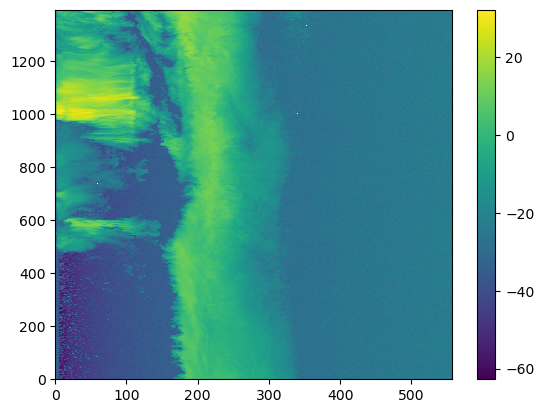

In [163]:
plt.pcolormesh(kazr.fields['reflectivity']['data'])
plt.colorbar()

Lets make it nicer!

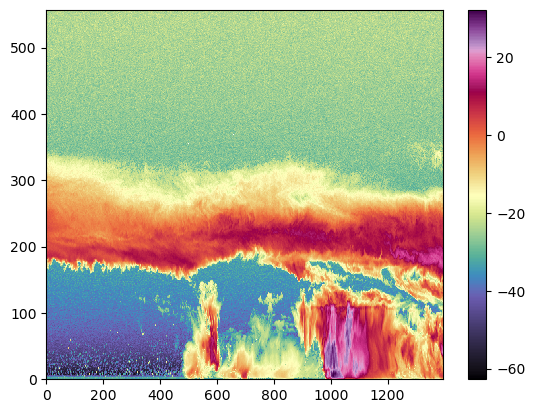

In [240]:
my_favorite_colormap = pyart.graph.cmweather.cm_colorblind.ChaseSpectral
plt.pcolormesh(kazr.fields['reflectivity']['data'].transpose(), cmap=my_favorite_colormap)
plt.colorbar()

Being a vertical pointing radar the geometry is simple, a time height cross section. 

Lets look at a scanning radar, a Ka band scanning cloud radar. 

In [164]:
kasacr = pyart.io.read('bnfkasacrcfrS4.a1.20250422.040001.nc')

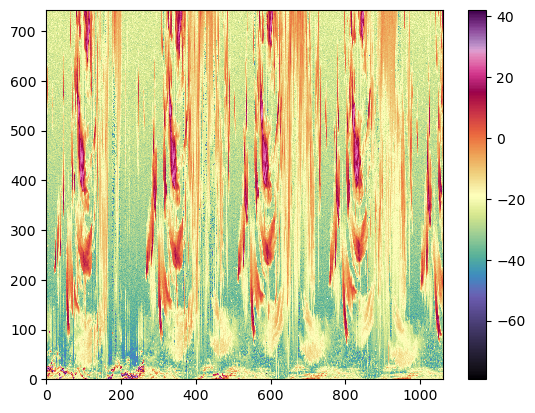

In [241]:
plt.pcolormesh(kasacr.fields['reflectivity']['data'].transpose(), cmap=my_favorite_colormap)
plt.colorbar()

ok! This is a little more complex! Here the antenna is moving. Lets look at the geometry. 

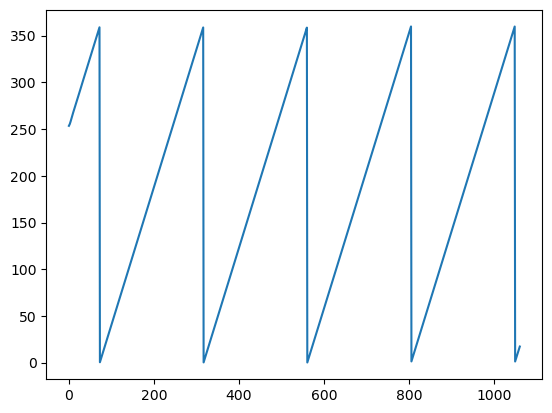

In [242]:
#Lets look at Azimuth
plt.plot(kasacr.azimuth['data'])

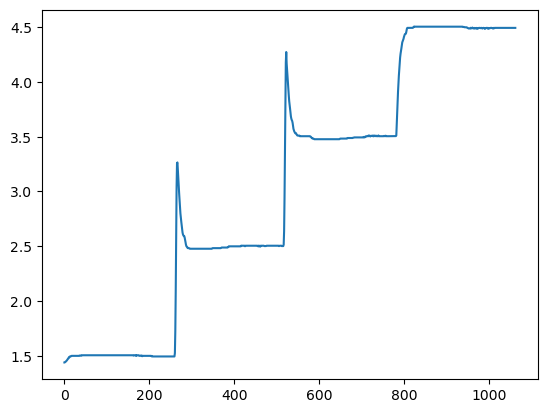

In [196]:
plt.plot(kasacr.elevation['data'])

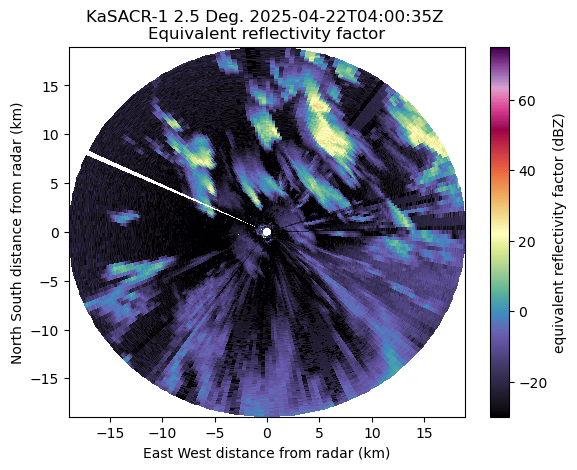

In [243]:
myd = pyart.graph.RadarDisplay(kasacr)
myd.plot_ppi('reflectivity', cmap=my_favorite_colormap)

## Now lets look at C-SAPR

In [168]:
csapr = pyart.io.read('bnfcsapr2cfrS3.a1.20250422.040012.nc')

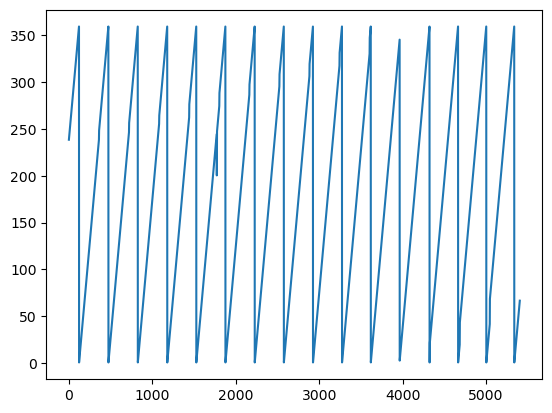

In [169]:
plt.plot(csapr.azimuth['data'])

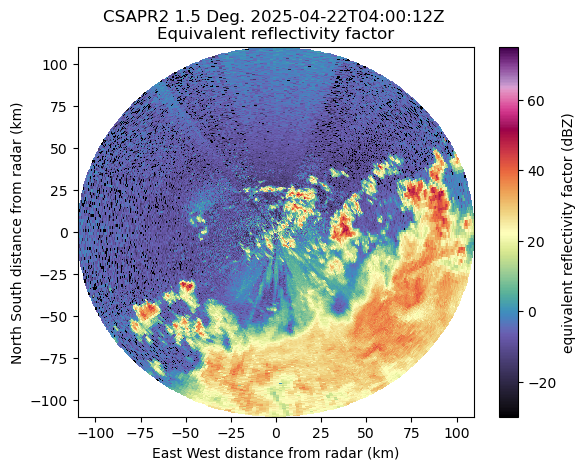

In [247]:
mydc = pyart.graph.RadarDisplay(csapr)
mydc.plot_ppi('reflectivity', cmap=my_favorite_colormap)

In [171]:
alt = kazr.gate_z['data']
dbz = kazr.fields['reflectivity']['data']

In [250]:
freq, height_edges, field_edges = np.histogram2d(
        alt.data.flatten(),
        dbz.data.flatten(), 
        bins = [np.linspace(0,15000,99), np.linspace(-60., 20., 79)])
      

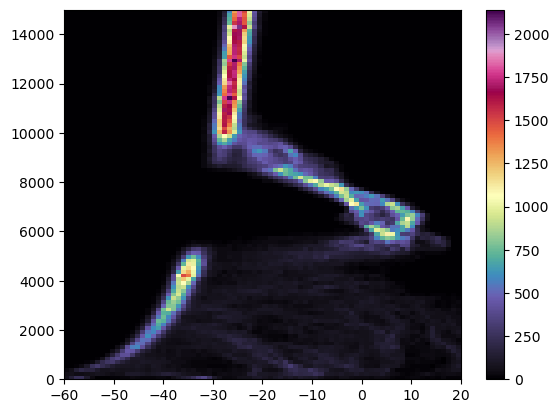

In [251]:
X, Y = np.meshgrid(height_edges, field_edges)
plt.pcolormesh(Y, X, freq.transpose(), cmap=my_favorite_colormap)
plt.colorbar()


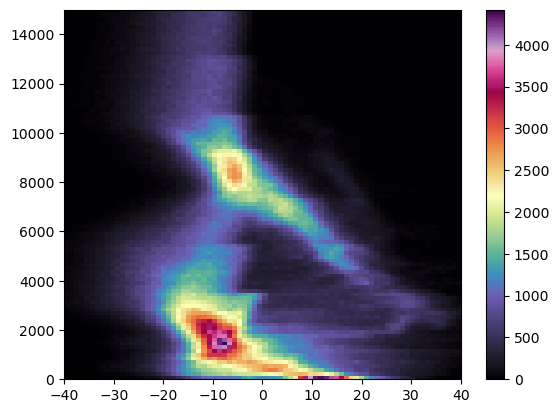

In [253]:
alt = csapr.gate_z['data']
dbz = csapr.fields['reflectivity']['data']
freq, height_edges, field_edges = np.histogram2d(
        alt.data.flatten(),
        dbz.data.flatten(), 
        bins = [np.linspace(0,15000,99), np.linspace(-40., 40., 79)])

X, Y = np.meshgrid(height_edges, field_edges)
plt.pcolormesh(Y, X, freq.transpose(), cmap=my_favorite_colormap)
plt.colorbar()


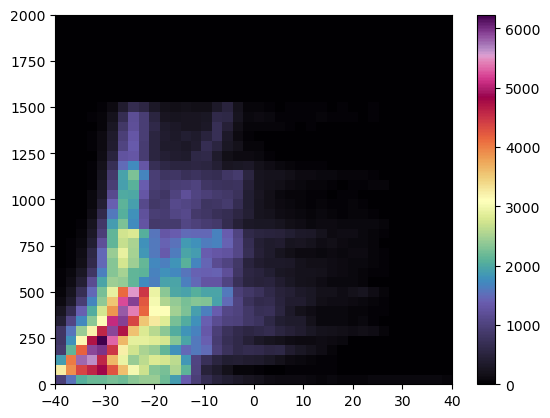

In [256]:
alt = kasacr.gate_z['data']
dbz = kasacr.fields['reflectivity']['data']
freq, height_edges, field_edges = np.histogram2d(
        alt.data.flatten(),
        dbz.data.flatten(), 
        bins = [np.linspace(0,2000,39), np.linspace(-40., 40., 39)])

X, Y = np.meshgrid(height_edges, field_edges)
plt.pcolormesh(Y, X, freq.transpose(), cmap=my_favorite_colormap)
plt.colorbar()


Number one rule of reflectivity club: Do math in linear units! 

As an example lets look at rainfall retrievals. One of the simplest way of doing a rainfall retrieval is to use a simple power law rainfall relation or, "Z R relation" of the form $Z=aR^b$. So $R=(Z \frac{1}{a})^{1/b}$

In [239]:
a_value=300.0
b_value=1.4

#Grab reflectivity value
refl = csapr.fields['reflectivity']["data"]

#Make linear reflectivity
linear_refl = 10.0**(refl/10.0)

#Retrieve rain rate
rr_data = ((1.0/a_value) * linear_refl)**(1.0/b_value)

#make a Py-ART field object
rain = pyart.config.get_metadata("radar_estimated_rain_rate")
rain["data"] = rr_data

#Add it back onto the radar object


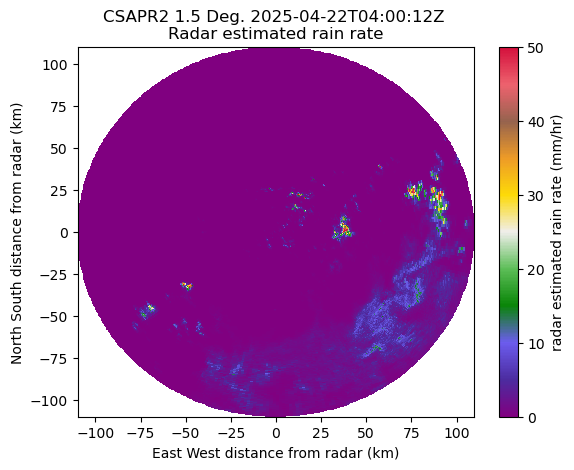

In [238]:
mydc = pyart.graph.RadarDisplay(csapr)
mydc.plot_ppi('radar_estimated_rain_rate')